# Yelp_dataset_chanllenge --- Preprocessing

## Introduction

[Yelp Dataset Chanllenge Link](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.

## Load the business data and make selections
- Because my computer memory is limited, I only loaded 2M reviews.
- The recommendation system should be made for one city and the same category of business, so I chose only restaurants in Las Vegas.

In [1]:
# Import the moduals we need
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [35]:
with open('data/yelp_academic_dataset_business.json', encoding='utf-8') as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [36]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [37]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


create the filters for city and categories

In [38]:
cond_category_not_null = ~df_business['categories'].isnull()
cond_restaurants = df_business['categories'].apply(str).str.contains('Restaurants')
cond_city_LV = df_business['city'] == 'Las Vegas'

df_business = df_business[cond_category_not_null & cond_city_LV & cond_restaurants]

Only keep the useful columns

In [41]:
selected_features = [u'business_id', u'name', u'categories', u'stars']
df_business = df_business[selected_features]

Change column 'stars' to 'ave_stars' in order to not conflict with the review data

In [44]:
df_business.rename(columns={'stars': 'avg_stars'}, inplace=True)

In [46]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
avg_stars      6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


## Load the review data and join with the business data

In [47]:
with open('data/yelp_academic_dataset_review.json', encoding='utf-8') as f:
    line_max = 2 * 10**6
    line_num = 0
    json_list = []
    
    for line in f:
        line_num += 1
        if line_num % 10**5 == 0:
            print('# of lines processed %i' % line_num)
        if line_num > line_max:
            break
        json_list.append(json.loads(line))


# of lines processed 100000
# of lines processed 200000
# of lines processed 300000
# of lines processed 400000
# of lines processed 500000
# of lines processed 600000
# of lines processed 700000
# of lines processed 800000
# of lines processed 900000
# of lines processed 1000000
# of lines processed 1100000
# of lines processed 1200000
# of lines processed 1300000
# of lines processed 1400000
# of lines processed 1500000
# of lines processed 1600000
# of lines processed 1700000
# of lines processed 1800000
# of lines processed 1900000
# of lines processed 2000000


In [48]:
df_review = pd.DataFrame(json_list)

In [49]:
df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [54]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 137.3+ MB


In [52]:
df_review.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

In [56]:
df_review.iloc[0]['text']

"The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

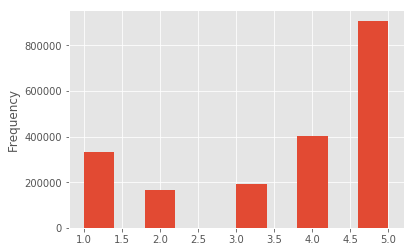

In [59]:
df_review['stars'].plot.hist()

In [60]:
df_joined = df_review.set_index('business_id').join(df_business.set_index('business_id'), how='inner')
df_joined = df_joined.reset_index()

In [61]:
df_joined.head()

,cool,date,funny,review_id,stars,text,useful,user_id,name,categories,avg_stars
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
--9e1ONYQuAa-CB_Rrw7Tw,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
--9e1ONYQuAa-CB_Rrw7Tw,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
--9e1ONYQuAa-CB_Rrw7Tw,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
--9e1ONYQuAa-CB_Rrw7Tw,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0


In [62]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310862 entries, --9e1ONYQuAa-CB_Rrw7Tw to zzzaIBwimxVej4tY6qFOUQ
Data columns (total 11 columns):
cool          310862 non-null int64
date          310862 non-null object
funny         310862 non-null int64
review_id     310862 non-null object
stars         310862 non-null int64
text          310862 non-null object
useful        310862 non-null int64
user_id       310862 non-null object
name          310862 non-null object
categories    310862 non-null object
avg_stars     310862 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 28.5+ MB


Choose only reviews in the last 2 years for less memory use and faster training

In [63]:
cond_last_2_years = df_joined['date'] > '2016-09-01'
df_joined = df_joined[cond_last_2_years]

In [66]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90788 entries, --9e1ONYQuAa-CB_Rrw7Tw to zx_j6OuuHHa2afVoAZuLpA
Data columns (total 11 columns):
cool          90788 non-null int64
date          90788 non-null object
funny         90788 non-null int64
review_id     90788 non-null object
stars         90788 non-null int64
text          90788 non-null object
useful        90788 non-null int64
user_id       90788 non-null object
name          90788 non-null object
categories    90788 non-null object
avg_stars     90788 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 8.3+ MB


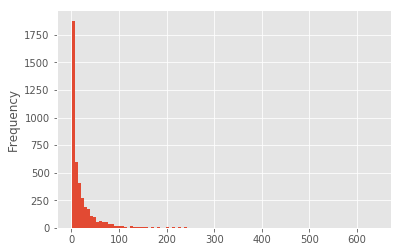

In [68]:
df_joined['business_id'].value_counts().plot.hist(bins=100)

## Save the data into a csv file

In [69]:
df_joined.to_csv('data/reviews_last2years_LV_restaurants.csv', index=False, encoding='utf-8')